In [3]:
import pynytimes
import pandas as pd
from pynytimes import NYTAPI
from my_api_info import get_nytimes_key
from datetime import datetime

Only if we want to dl NY data from its api

In [19]:
nytapi = NYTAPI(get_nytimes_key(), parse_dates=True)
results = nytapi.article_search(query="Google",
                                results=2000,
                                dates={'begin':datetime(2020,1,1),
                                       'end':datetime(2023,12,30)})


/opt/anaconda3/envs/npss/lib/python3.12/site-packages/pynytimes/helpers/article_search.py:33: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [40]:
len(results)

2000

In [21]:
NYdata = pd.DataFrame(results)
NYdata['pub_date'] = pd.to_datetime(NYdata['pub_date'])
NYdata['Date']=NYdata['pub_date'].dt.date
NYdata.set_index('Date', inplace=True)
NYdata = NYdata[~NYdata.index.duplicated(keep='first')]
NYdata=NYdata.sort_index()
NYdata.to_csv('NYdatagoogle.csv', index=True)

In [22]:
NYdata.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name,slideshow_credits
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,"Never miss an eclipse, a meteor shower, a rock...",https://www.nytimes.com/interactive/2020/scien...,"Never miss an eclipse, a meteor shower, a rock...","Never miss an eclipse, a meteor shower, a rock...",NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Sync your calendar with the solar sy...,"[{'name': 'subject', 'value': 'Space and Astro...",...,multimedia,Science,Science,"{'original': 'By Michael Roston', 'person': [{...",Interactive Feature,nyt://interactive/5b58d876-9351-50af-9b41-a312...,0,nyt://interactive/5b58d876-9351-50af-9b41-a312...,NaN,NaN
2020-01-05,"Amazon, Apple, Facebook and Google will soon h...",https://www.nytimes.com/2020/01/05/nyregion/ny...,"Amazon, Apple, Facebook and Google will soon h...",When Facebook was searching for another New Yo...,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Silicon Valley’s Newest Rival: The B...,"[{'name': 'subject', 'value': 'Computers and t...",...,article,Metro,New York,"{'original': 'By Matthew Haag', 'person': [{'f...",News,nyt://article/af03dc02-62b0-551f-9f88-c564e90d...,1760,nyt://article/af03dc02-62b0-551f-9f88-c564e90d...,NaN,NaN
2020-01-06,Most of the big winners from the evening are s...,https://www.nytimes.com/2020/01/06/movies/gold...,Most of the big winners from the evening are s...,Of all the films that competed for best drama ...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Golden Globes 2020: Where to Stream ...,"[{'name': 'subject', 'value': 'Golden Globes (...",...,article,Culture,Movies,"{'original': 'By Scott Tobias', 'person': [{'f...",News,nyt://article/c28188c9-80e6-56b0-aa31-1bdefccd...,1463,nyt://article/c28188c9-80e6-56b0-aa31-1bdefccd...,NaN,NaN
2020-01-07,The maker of home speakers said Google and Ama...,https://www.nytimes.com/2020/01/07/technology/...,The maker of home speakers said Google and Ama...,"SANTA BARBARA, Calif. — In 2013, Sonos scored ...",B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Sonos, Squeezed by the Tech Giants, ...","[{'name': 'subject', 'value': 'Computers and t...",...,article,Business,Technology,{'original': 'By Jack Nicas and Daisuke Wakaba...,News,nyt://article/5745221d-0670-5141-9d27-83ee14a7...,1595,nyt://article/5745221d-0670-5141-9d27-83ee14a7...,NaN,NaN
2020-01-10,"David Drummond, who played a key role for the ...",https://www.nytimes.com/2020/01/10/technology/...,"David Drummond, who played a key role for the ...","SAN FRANCISCO — David Drummond, the chief lega...",B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Alphabet’s Chief Legal Officer Stepp...,"[{'name': 'subject', 'value': 'Computers and t...",...,article,Business,Technology,"{'original': 'By Daisuke Wakabayashi', 'person...",News,nyt://article/d9afe9e5-7de6-5165-8723-56a5516f...,844,nyt://article/d9afe9e5-7de6-5165-8723-56a5516f...,NaN,NaN


In [24]:
goog_price=pd.read_csv("./stock_prices/GOOG.csv", parse_dates=['Date'])
goog_price.set_index('Date', inplace=True)
goog_price.sort_index()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000
2020-01-08,69.603996,70.579002,69.542000,70.216003,70.216003,30560000
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400


If we want to load Ny data and not dl it form NY api

In [26]:
# NYdata=pd.read_csv('NYdata.csv', index_col='Date', parse_dates=True)
# NYdata[~NYdata.index.duplicated(keep='first')]
# NYdata=NYdata.sort_index()
# NYdata.to_csv('NYdata.csv', index=True)

In [37]:
NYdata.head()
len(NYdata)

940

In [27]:
Data_combined = pd.merge(NYdata, goog_price, left_index=True, right_index=True, how='outer')

In [28]:
Data_combined.tail()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,word_count,uri,subsection_name,slideshow_credits,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,"Plus, a very special “Hard Fork” holiday surpr...",https://www.nytimes.com/2023/12/22/podcasts/ha...,"Plus, a very special “Hard Fork” holiday surpr...","Last year, we predicted what 2023 in tech woul...",NaN,NaN,The New York Times,[],"{'main': 'Our 2024 Predictions, and Jenny Slat...","[{'name': 'subject', 'value': 'Science and Tec...",...,87.0,nyt://article/7e339956-e6e8-5de1-bed3-679bfa38...,NaN,NaN,142.130005,143.250000,142.054993,142.720001,142.720001,18494700.0
2023-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,142.979996,143.945007,142.500000,142.820007,142.820007,11170100.0
2023-12-27,"If 2023 was the year of A.I. awakening, 2024 c...",https://www.nytimes.com/2023/12/27/business/de...,"If 2023 was the year of A.I. awakening, 2024 c...",Mustafa Suleyman remembers the epochal moment ...,B,4,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'What’s Next in Artificial Intelligen...,"[{'name': 'subject', 'value': 'internal-storyl...",...,1185.0,nyt://article/b392378e-ee0b-5c83-ae25-185ee061...,DealBook,NaN,142.830002,143.320007,141.050995,141.440002,141.440002,17288400.0
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,141.850006,142.270004,140.828003,141.279999,141.279999,12192500.0
2023-12-29,Donald Trump’s former fixer had sought an earl...,https://www.nytimes.com/2023/12/29/nyregion/mi...,Donald Trump’s former fixer had sought an earl...,"Michael D. Cohen, the onetime fixer for former...",A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Michael Cohen Used Artificial Intell...,"[{'name': 'persons', 'value': 'Cohen, Michael ...",...,1263.0,nyt://article/41ecd674-0750-5a55-aadd-0855b088...,NaN,NaN,140.679993,141.434998,139.899994,140.929993,140.929993,14872700.0


In [29]:
for i in range(len(Data_combined)):
    if not isinstance(Data_combined['abstract'][i], str):
        Data_combined['abstract'][i]=''

/var/folders/x3/gbx5bf692bsb2gf_sq9cymn40000gn/T/ipykernel_61326/1913076642.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not isinstance(Data_combined['abstract'][i], str):
/var/folders/x3/gbx5bf692bsb2gf_sq9cymn40000gn/T/ipykernel_61326/1913076642.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"

In [30]:
Data_combined.tail()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,word_count,uri,subsection_name,slideshow_credits,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,"Plus, a very special “Hard Fork” holiday surpr...",https://www.nytimes.com/2023/12/22/podcasts/ha...,"Plus, a very special “Hard Fork” holiday surpr...","Last year, we predicted what 2023 in tech woul...",NaN,NaN,The New York Times,[],"{'main': 'Our 2024 Predictions, and Jenny Slat...","[{'name': 'subject', 'value': 'Science and Tec...",...,87.0,nyt://article/7e339956-e6e8-5de1-bed3-679bfa38...,NaN,NaN,142.130005,143.250000,142.054993,142.720001,142.720001,18494700.0
2023-12-26,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,142.979996,143.945007,142.500000,142.820007,142.820007,11170100.0
2023-12-27,"If 2023 was the year of A.I. awakening, 2024 c...",https://www.nytimes.com/2023/12/27/business/de...,"If 2023 was the year of A.I. awakening, 2024 c...",Mustafa Suleyman remembers the epochal moment ...,B,4,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'What’s Next in Artificial Intelligen...,"[{'name': 'subject', 'value': 'internal-storyl...",...,1185.0,nyt://article/b392378e-ee0b-5c83-ae25-185ee061...,DealBook,NaN,142.830002,143.320007,141.050995,141.440002,141.440002,17288400.0
2023-12-28,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,141.850006,142.270004,140.828003,141.279999,141.279999,12192500.0
2023-12-29,Donald Trump’s former fixer had sought an earl...,https://www.nytimes.com/2023/12/29/nyregion/mi...,Donald Trump’s former fixer had sought an earl...,"Michael D. Cohen, the onetime fixer for former...",A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Michael Cohen Used Artificial Intell...,"[{'name': 'persons', 'value': 'Cohen, Michael ...",...,1263.0,nyt://article/41ecd674-0750-5a55-aadd-0855b088...,NaN,NaN,140.679993,141.434998,139.899994,140.929993,140.929993,14872700.0


In [31]:
Data_combined.to_csv('NYdatagoogle_with_price.csv', index=True)

In [33]:
Data_combined.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11',
               ...
               '2023-12-16', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1128, freq=None)

In [36]:
Data_combined=Data_combined.reset_index()
Data_combined.tail()

,Date,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,...,word_count,uri,subsection_name,slideshow_credits,Open,High,Low,Close,Adj Close,Volume
1123,2023-12-22,"Plus, a very special “Hard Fork” holiday surpr...",https://www.nytimes.com/2023/12/22/podcasts/ha...,"Plus, a very special “Hard Fork” holiday surpr...","Last year, we predicted what 2023 in tech woul...",NaN,NaN,The New York Times,[],"{'main': 'Our 2024 Predictions, and Jenny Slat...",...,87.0,nyt://article/7e339956-e6e8-5de1-bed3-679bfa38...,NaN,NaN,142.130005,143.250000,142.054993,142.720001,142.720001,18494700.0
1124,2023-12-26,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,142.979996,143.945007,142.500000,142.820007,142.820007,11170100.0
1125,2023-12-27,"If 2023 was the year of A.I. awakening, 2024 c...",https://www.nytimes.com/2023/12/27/business/de...,"If 2023 was the year of A.I. awakening, 2024 c...",Mustafa Suleyman remembers the epochal moment ...,B,4,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'What’s Next in Artificial Intelligen...,...,1185.0,nyt://article/b392378e-ee0b-5c83-ae25-185ee061...,DealBook,NaN,142.830002,143.320007,141.050995,141.440002,141.440002,17288400.0
1126,2023-12-28,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,141.850006,142.270004,140.828003,141.279999,141.279999,12192500.0
1127,2023-12-29,Donald Trump’s former fixer had sought an earl...,https://www.nytimes.com/2023/12/29/nyregion/mi...,Donald Trump’s former fixer had sought an earl...,"Michael D. Cohen, the onetime fixer for former...",A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Michael Cohen Used Artificial Intell...,...,1263.0,nyt://article/41ecd674-0750-5a55-aadd-0855b088...,NaN,NaN,140.679993,141.434998,139.899994,140.929993,140.929993,14872700.0


In [43]:
Data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Date               1128 non-null   datetime64[ns]     
 1   abstract           1128 non-null   object             
 2   web_url            940 non-null    object             
 3   snippet            940 non-null    object             
 4   lead_paragraph     940 non-null    object             
 5   print_section      558 non-null    object             
 6   print_page         558 non-null    object             
 7   source             937 non-null    object             
 8   multimedia         940 non-null    object             
 9   headline           940 non-null    object             
 10  keywords           940 non-null    object             
 11  pub_date           940 non-null    datetime64[ns, UTC]
 12  document_type      940 non-null    object       

In [51]:

Data_combined_dict={}
Data_combined_dict['train']=Data_combined.iloc[:int(len(Data_combined)-60)]    
Data_combined_dict['test']=Data_combined.iloc[int(len(Data_combined)-60):]

In [52]:
len(Data_combined_dict['test'])

60

In [53]:
from datasets import Dataset, DatasetDict

In [54]:
datasets_dict = {key: Dataset.from_pandas(df) for key, df in Data_combined_dict.items()}

# Create a DatasetDict object
dataset_dict = DatasetDict(datasets_dict)

In [55]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['Date', 'abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri', 'subsection_name', 'slideshow_credits', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
        num_rows: 1068
    })
    test: Dataset({
        features: ['Date', 'abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri', 'subsection_name', 'slideshow_credits', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
        num_rows: 60
    })
})

In [56]:
dataset_dict.save_to_disk('NYdata_GOOG_datset')

Saving the dataset (0/1 shards):   0%|          | 0/1068 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/60 [00:00<?, ? examples/s]

In [57]:
dataset_dict['train']['Date']

[Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-01-02 00:00:00'),
 Timestamp('2020-01-03 00:00:00'),
 Timestamp('2020-01-05 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-07 00:00:00'),
 Timestamp('2020-01-08 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-11 00:00:00'),
 Timestamp('2020-01-12 00:00:00'),
 Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-14 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-17 00:00:00'),
 Timestamp('2020-01-19 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-01-21 00:00:00'),
 Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-

To load the dataset and examine

In [58]:
# from datasets import load_from_disk
# dataset_dict2 = load_from_disk('NYdata_SP_datset')

In [59]:
# dataset_dict2

In [60]:
import json
import time
from typing import Dict

from datasets import load_dataset # type: ignore
from datasets.formatting.formatting import LazyBatch # type: ignore
from huggingface_hub import list_datasets # type: ignore
import matplotlib.pyplot as plt
from minio import Minio
from minio.datatypes import Object
from minio.helpers import ObjectWriteResult
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import torch
from transformers import AutoModel, AutoTokenizer
from transformers.tokenization_utils_base import BatchEncoding

GOOGLE has been downloaded from NY times using API.

In [61]:
from datasets import load_from_disk
NYdata_google = load_from_disk('NYdata_GOOG_datset')
NYdata_google

DatasetDict({
    train: Dataset({
        features: ['Date', 'abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri', 'subsection_name', 'slideshow_credits', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
        num_rows: 1068
    })
    test: Dataset({
        features: ['Date', 'abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri', 'subsection_name', 'slideshow_credits', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
        num_rows: 60
    })
})

In [63]:

NYdata_google['train']['lead_paragraph'][10:25]


['CORNELIA, Ga. — When a sport utility vehicle swerved out of its lane several weeks ago, slamming into a pickup truck and killing a teenager, a reporter from The Northeast Georgian raced to the scene. Within hours, the paper had posted the news on Facebook and updated it twice. It was shared by hundreds of people on the social network.',
 'Sign up for our Watching newsletter to get recommendations on the best films and TV shows to stream and watch, delivered to your inbox.',
 None,
 'Nowadays we don’t really buy things. We just subscribe to online services.',
 'SAN FRANCISCO — Numbers have long held a special significance at Google.',
 'For all the criticisms directed at the largest tech companies in the last couple of years, few smaller rivals have been willing to speak up publicly.',
 'Subscribe to “The Choice” on your favorite listening app:',
 '',
 'Subscribe to “The Choice” on your favorite listening app:',
 'Apple added its Siri assistant to the iPhone 4S model in 2011, giving u

Upload and Download data on local MinIO server to make it compatible for feature extraction on Hugging face.

In [64]:
def get_object(bucket_name: str, object_name: str, file_path: str):
    '''
    This function will download an object from MinIO to the specified file_path
    and return the object_info.
    '''

    # Load the credentials and connection information.
    with open('credentials_mahdi.json') as f:
        credentials = json.load(f)

    # Create client with access and secret key
    client = Minio(credentials['url'],  # host.docker.internal
                credentials['accessKey'],  
                credentials['secretKey'], 
                secure=False)
    
    # Get data of an object.
    object_info = client.fget_object(bucket_name, object_name, file_path)

    return object_info


def put_file(bucket_name: str, object_name: str, file_path: str):
    '''
    This function will upload a file to MinIO and return the object_info.
    '''

    # Load the credentials and connection information.
    with open('credentials_mahdi.json') as f:
        credentials = json.load(f)
    print(credentials['url'])
    # Create client with access and secret key
    client = Minio(credentials['url'],  # host.docker.internal
                credentials['accessKey'],  
                credentials['secretKey'], 
                secure=False)
    
    # Make sure bucket exists.
    found = client.bucket_exists(bucket_name)
    if not found:
        client.make_bucket(bucket_name)

    # Upload the file.
    object_write_result = client.fput_object(bucket_name, object_name, file_path)

    return object_write_result

Putting data on MinIO.

In [65]:
bucket_name = 'nspp-data-google'
for split, dataset in NYdata_google.items():
    dataset.to_json(f'nspp-{split}.jsonl')
    object_write_results = put_file(bucket_name, f'nspp-{split}.jsonl', f'nspp-{split}.jsonl')
    print(object_write_results.object_name, object_write_results.location)


Creating json from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

192.168.1.4:9000
nspp-train.jsonl http://192.168.1.4:9000/nspp-data-google/nspp-train.jsonl


Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

192.168.1.4:9000
nspp-test.jsonl None


Downloading data from MinIO

In [66]:
data_files = {}
for split in ['train', 'test']:
    data_files[split] = f'nspp-{split}.jsonl'
    object_info = get_object(bucket_name, f'nspp-{split}.jsonl', f'nspp-{split}.jsonl')
    print(object_info.object_name, object_info.last_modified)

nspp = load_dataset('json', data_files=data_files)

nspp-train.jsonl 2024-05-28 02:35:44+00:00
nspp-test.jsonl 2024-05-28 02:35:44+00:00


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [67]:
nspp

DatasetDict({
    train: Dataset({
        features: ['Date', 'abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri', 'subsection_name', 'slideshow_credits', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
        num_rows: 1068
    })
    test: Dataset({
        features: ['Date', 'abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri', 'subsection_name', 'slideshow_credits', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
        num_rows: 60
    })
})

Changing the format of data to panda frame.

In [68]:
nspp.set_format(type='pandas')
df_nspp = nspp['train'][:]
df_nspp.head()


,Date,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,...,word_count,uri,subsection_name,slideshow_credits,Open,High,Low,Close,Adj Close,Volume
0,1577836800000,"Never miss an eclipse, a meteor shower, a rock...",https://www.nytimes.com/interactive/2020/scien...,"Never miss an eclipse, a meteor shower, a rock...","Never miss an eclipse, a meteor shower, a rock...",None,None,The New York Times,"[{'caption': None, 'credit': None, 'crop_name'...","{'content_kicker': None, 'kicker': None, 'main...",...,0.0,nyt://interactive/5b58d876-9351-50af-9b41-a312...,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,1577923200000,,None,None,None,None,None,None,None,None,...,NaN,None,None,None,67.077499,68.406998,67.077499,68.368500,68.368500,28132000.0
2,1578009600000,,None,None,None,None,None,None,None,None,...,NaN,None,None,None,67.392998,68.625000,67.277199,68.032997,68.032997,23728000.0
3,1578182400000,"Amazon, Apple, Facebook and Google will soon h...",https://www.nytimes.com/2020/01/05/nyregion/ny...,"Amazon, Apple, Facebook and Google will soon h...",When Facebook was searching for another New Yo...,A,1,The New York Times,"[{'caption': None, 'credit': None, 'crop_name'...","{'content_kicker': None, 'kicker': None, 'main...",...,1760.0,nyt://article/af03dc02-62b0-551f-9f88-c564e90d...,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,1578268800000,Most of the big winners from the evening are s...,https://www.nytimes.com/2020/01/06/movies/gold...,Most of the big winners from the evening are s...,Of all the films that competed for best drama ...,None,None,The New York Times,"[{'caption': None, 'credit': None, 'crop_name'...","{'content_kicker': None, 'kicker': None, 'main...",...,1463.0,nyt://article/c28188c9-80e6-56b0-aa31-1bdefccd...,None,None,67.500000,69.824997,67.500000,69.710503,69.710503,34646000.0


In [69]:
import torch # type: ignore
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

Loading the distilted version of Bert language model

In [70]:
model_check_point = 'distilbert-base-uncased'
model = AutoModel.from_pretrained(model_check_point).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_check_point)
print(type(model))
print(type(tokenizer))

<class 'transformers.models.distilbert.modeling_distilbert.DistilBertModel'>
<class 'transformers.models.distilbert.tokenization_distilbert_fast.DistilBertTokenizerFast'>


Tokenizes the features.

In [71]:
nspp.reset_format()
def tokenize(batch) -> BatchEncoding:
    out = tokenizer(batch['abstract'], padding=True, truncation=True, return_tensors='pt')
    return out



In [72]:
nspp_encoded = nspp.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/1068 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [73]:
print(type(nspp_encoded))

<class 'datasets.dataset_dict.DatasetDict'>


In [74]:
nspp_encoded['train'][0]

{'Date': 1577836800000,
 'abstract': "Never miss an eclipse, a meteor shower, a rocket launch or any other astronomical and space event that's out of this world.",
 'web_url': 'https://www.nytimes.com/interactive/2020/science/2020-astronomy-space-calendar.html',
 'snippet': "Never miss an eclipse, a meteor shower, a rocket launch or any other astronomical and space event that's out of this world.",
 'lead_paragraph': "Never miss an eclipse, a meteor shower, a rocket launch or any other astronomical and space event that's out of this world.",
 'print_section': None,
 'print_page': None,
 'source': 'The New York Times',
 'multimedia': [{'caption': None,
   'credit': None,
   'crop_name': 'articleLarge',
   'height': 300,
   'legacy': {'thumbnail': None,
    'thumbnailheight': None,
    'thumbnailwidth': None,
    'wide': None,
    'wideheight': None,
    'widewidth': None,
    'xlarge': 'images/2020/09/07/science/04SUN1/04SUN1-articleLarge.png',
    'xlargeheight': 300.0,
    'xlargewidt

In [75]:
def extract_hidden_states(batch) -> Dict:
    # Move the model inputs to the appropriate device.
    #print(batch.items())
    #bra
    inputs_dict = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # Call the model and extract the hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs_dict).last_hidden_state
    # Return the vector for the [CLS] token.
    return {'hidden_state': last_hidden_state[:,0].cpu().numpy()}

chooses specific columns in dataset and saves in nspp_en_tiny dataset for inference. The reason is that torch does not work with Datetime

In [76]:
from datasets import  DatasetDict

# Initialize the new DatasetDict to store the smaller dataset
nspp_en_tiny = DatasetDict()
columns_to_keep = ['input_ids', 'attention_mask']
# Iterate over the splits in the encoded dataset
for split in nspp_encoded:
    # Use the map function to remove unwanted columns
    nspp_en_tiny[split] = nspp_encoded[split].map(
        lambda examples: {key: examples[key] for key in columns_to_keep},
        remove_columns=[col for col in nspp_encoded[split].column_names if col not in columns_to_keep]
    )


Map:   0%|          | 0/1068 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [77]:
type(nspp_en_tiny)

datasets.dataset_dict.DatasetDict

In [78]:
nspp_en_tiny['train'].column_names


['input_ids', 'attention_mask']

In [79]:
start = time.perf_counter()
nspp_en_tiny.set_format('torch', columns=['input_ids', 'attention_mask'])
nspp_tiny_hidden = nspp_en_tiny.map(extract_hidden_states, batched=True)
end = time.perf_counter()
print(f'Inference took {end - start:0.4f} seconds.')

Map:   0%|          | 0/1068 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

Inference took 12.9965 seconds.


In [80]:
print(type(nspp_tiny_hidden))                   
nspp_tiny_hidden['train'].column_names

<class 'datasets.dataset_dict.DatasetDict'>


['input_ids', 'attention_mask', 'hidden_state']

In [ ]:
nspp_encoded['train']['Date'][0]
NYdata_google['train']['Date'][-1:]


In [89]:
nspp_encoded['train'] = nspp_encoded['train'].remove_columns('Date')
nspp_encoded['train'] = nspp_encoded['train'].add_column('Date', NYdata_google['train']['Date'])

# nspp_encoded['validation'] = nspp_encoded['validation'].remove_columns('Date')
# nspp_encoded['validation'] = nspp_encoded['validation'].add_column('Date', NYdata_google['validation']['Date'])

nspp_encoded['test'] = nspp_encoded['test'].remove_columns('Date')
nspp_encoded['test'] = nspp_encoded['test'].add_column('Date', NYdata_google['test']['Date'])

In [91]:
from datasets import DatasetDict, Dataset


# Merging columns from the two DatasetDict objects
merged_dict = {}

# Assuming both DatasetDict objects have the same keys and same number of rows in corresponding datasets
for key in nspp_encoded.keys():
    # Extract datasets
    ds1 = nspp_encoded[key]
    ds2 = nspp_tiny_hidden[key]
    
    # Convert to pandas DataFrames
    df1 = ds1.to_pandas()
    df2 = ds2.to_pandas()
    
    # Concatenate DataFrames horizontally (axis=1)
    merged_df = pd.concat([df1[:][['Date','Close']], df2[:]['hidden_state']], axis=1)
    
    # Convert back to Dataset
    merged_dict[key] = Dataset.from_pandas(merged_df)

# Create a new DatasetDict with the merged datasets
merged_dataset_dict = DatasetDict(merged_dict)

# Print the merged DatasetDict to see the result
print(merged_dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['Date', 'Close', 'hidden_state'],
        num_rows: 1068
    })
    test: Dataset({
        features: ['Date', 'Close', 'hidden_state'],
        num_rows: 60
    })
})


In [92]:
(merged_dataset_dict.column_names)

{'train': ['Date', 'Close', 'hidden_state'],
 'test': ['Date', 'Close', 'hidden_state']}

In [93]:
merged_dataset_dict['train']['Date'][0]

datetime.datetime(2020, 1, 1, 0, 0)

In [94]:

for split,data in merged_dataset_dict.items():
    #nspp_tiny_hidden[split] = data.remove_columns('hidden_state')
    print(data)
    print(split)
    

Dataset({
    features: ['Date', 'Close', 'hidden_state'],
    num_rows: 1068
})
train
Dataset({
    features: ['Date', 'Close', 'hidden_state'],
    num_rows: 60
})
test


In [95]:
merged_dataset_dict.save_to_disk('Merged_Close_feature_google_date')


Saving the dataset (0/1 shards):   0%|          | 0/1068 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/60 [00:00<?, ? examples/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
END OF PROCESSING DATA. NEXT WE NEED TO FIT THE MODEL.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [2]:
import json
import time
from typing import Dict

from datasets import load_dataset, load_from_disk# type: ignore
from datasets.formatting.formatting import LazyBatch # type: ignore
from huggingface_hub import list_datasets # type: ignore
import matplotlib.pyplot as plt
from minio import Minio
from minio.datatypes import Object
from minio.helpers import ObjectWriteResult
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import torch
from transformers import AutoModel, AutoTokenizer
from transformers.tokenization_utils_base import BatchEncoding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import set_style

Loading the dataset

In [3]:
data = load_from_disk('Merged_Close_feature_google_date')
data

DatasetDict({
    train: Dataset({
        features: ['Date', 'Close', 'hidden_state'],
        num_rows: 1068
    })
    test: Dataset({
        features: ['Date', 'Close', 'hidden_state'],
        num_rows: 60
    })
})

Transforming to pandas data frame

In [4]:

ds_train = data['train']
ds_test = data['test']

df_train = pd.DataFrame(ds_train)
df_test = pd.DataFrame(ds_test)


    

In [5]:
df_train['Close_numeric']=np.nan
df_test['Close_numeric']=np.nan
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1068 non-null   datetime64[ns]
 1   Close          954 non-null    float64       
 2   hidden_state   1068 non-null   object        
 3   Close_numeric  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 33.5+ KB


In [6]:
print(df_test['Close'][-30:])

30    138.220001
31           NaN
32    138.050003
33    138.619995
34    136.399994
35    133.919998
36    133.320007
37           NaN
38           NaN
39    130.630005
40    132.389999
41    131.429993
42    138.449997
43    136.639999
44           NaN
45    134.699997
46    133.639999
47    133.970001
48    133.199997
49    133.839996
50           NaN
51    137.190002
52    138.100006
53    139.660004
54    141.800003
55    142.720001
56    142.820007
57    141.440002
58    141.279999
59    140.929993
Name: Close, dtype: float64


In [7]:
# for i in range(0, len(df_train)):
#     if df_train['Close'][i] != None:
#         df_train['Close_numeric'][i] = float(df_train['Close'][i].replace(',', ''))

# for i in range(0, len(df_test)):
#     if df_test['Close'][i] != None:
#         df_test['Close_numeric'][i] = float(df_test['Close'][i].replace(',', ''))

df_test['Close_numeric']=df_test['Close']
df_train['Close_numeric']=df_train['Close']

    

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1068 non-null   datetime64[ns]
 1   Close          954 non-null    float64       
 2   hidden_state   1068 non-null   object        
 3   Close_numeric  954 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 33.5+ KB


Treat missing values

In [9]:
df_train['Close_numeric'].interpolate(method='nearest', inplace=True)
df_test['Close_numeric'].interpolate(method='nearest', inplace=True)
# Other methods: 'polynomial', 'spline', 'quadratic'
#df_train['Close'].interpolate(method='polynomial', order=2, inplace=True)  # Polynomial interpolation of order 2


/var/folders/x3/gbx5bf692bsb2gf_sq9cymn40000gn/T/ipykernel_67061/1355734988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Close_numeric'].interpolate(method='nearest', inplace=True)
/var/folders/x3/gbx5bf692bsb2gf_sq9cymn40000gn/T/ipykernel_67061/1355734988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1068 non-null   datetime64[ns]
 1   Close          954 non-null    float64       
 2   hidden_state   1068 non-null   object        
 3   Close_numeric  1067 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 33.5+ KB


In [11]:
df_train['Close_numeric'][0]=df_train['Close_numeric'][1]


/var/folders/x3/gbx5bf692bsb2gf_sq9cymn40000gn/T/ipykernel_67061/2019482098.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_train['Close_numeric'][0]=df_train['Close_numeric'][1]
/var/folders/x3/gbx5bf692bsb2gf_sq9cymn40000gn/T/ipyker

In [12]:
# df_train['Close_numeric'][0]=df_train['Close_numeric'][1]
# df_test['Close_numeric'][len(df_test)-1]=df_test['Close_numeric'][len(df_test)-2]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           60 non-null     datetime64[ns]
 1   Close          52 non-null     float64       
 2   hidden_state   60 non-null     object        
 3   Close_numeric  60 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.0+ KB


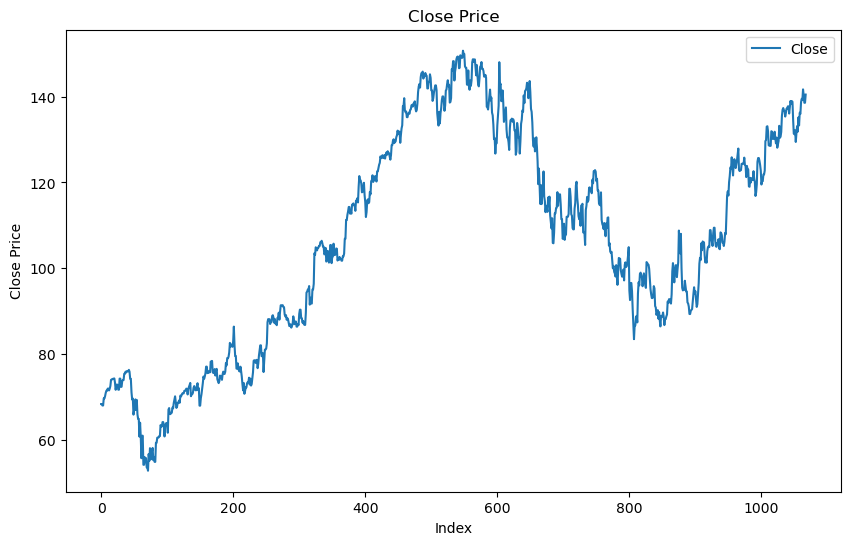

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,len(df_train['Close_numeric'])), df_train['Close_numeric'], label='Close')

plt.title('Close Price')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


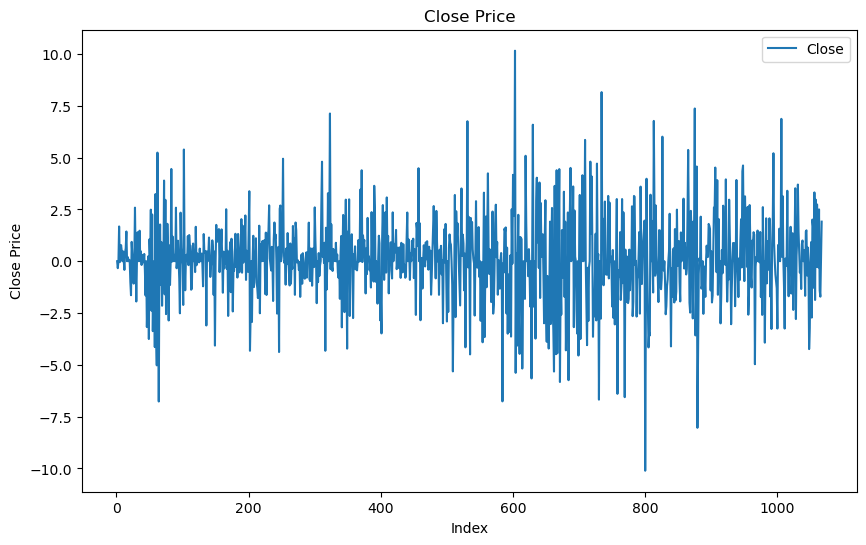

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,len(df_train['Close_numeric'])), df_train['Close_numeric'].diff(), label='Close')
plt.title('Close Price')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

SARIMA model without exogenous random variable  

In [15]:
import statsmodels.tsa.api as sm

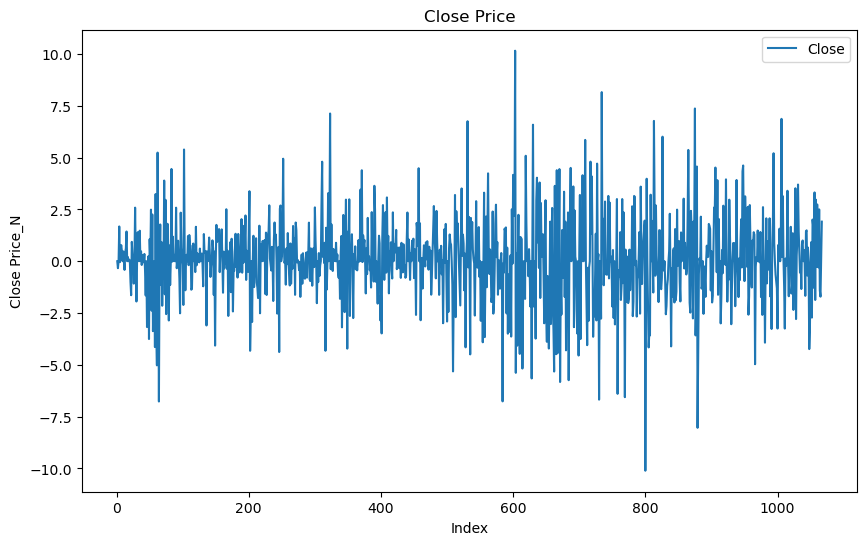

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,len(df_train['Close_numeric'])), df_train['Close_numeric'].diff(), label='Close')
plt.title('Close Price')
plt.xlabel('Index')
plt.ylabel('Close Price_N')
plt.legend()
plt.show()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

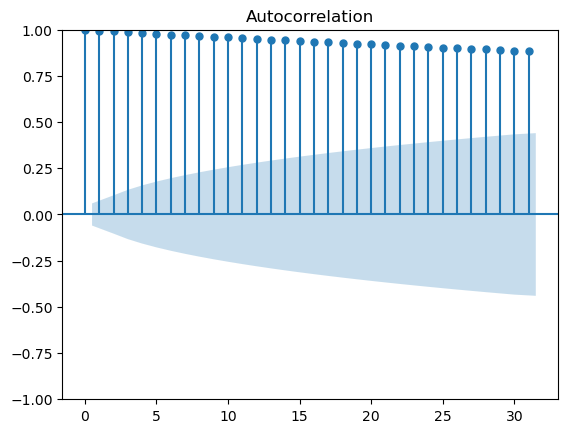

In [18]:
plot_acf(df_train['Close_numeric'].dropna())
plt.show()

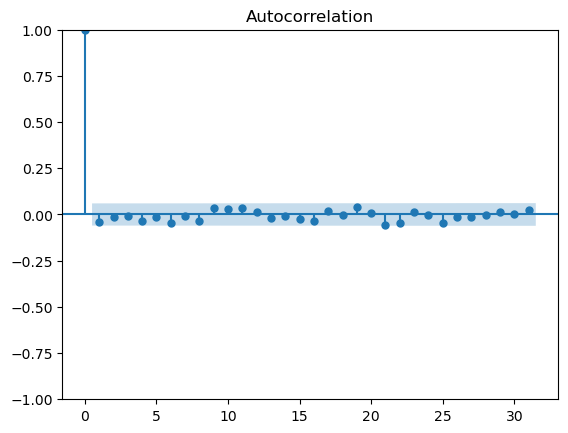

In [19]:
plot_acf(df_train['Close_numeric'].diff().dropna())
plt.show()

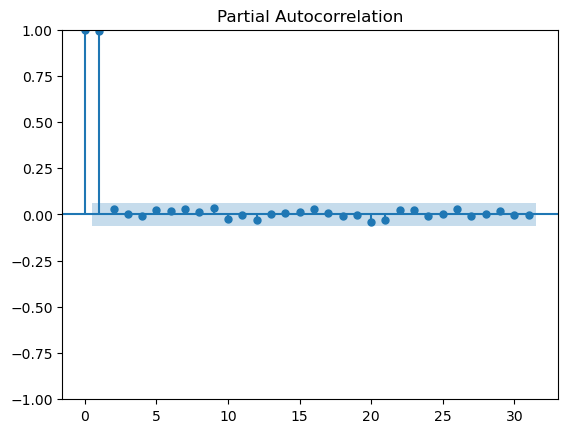

In [20]:
plot_pacf(df_train['Close_numeric'].dropna())
plt.show()

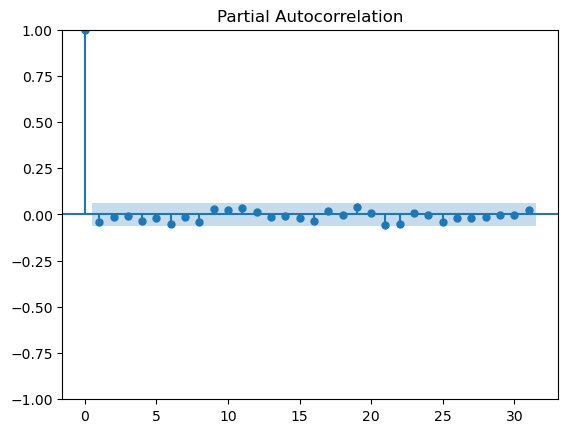

In [21]:
plot_pacf(df_train['Close_numeric'].diff().dropna())
plt.show()

In [22]:
from pmdarima import auto_arima

In [23]:
df_diff=df_train['Close_numeric'].diff()
df_diff[0]=0
auto_arima(df_diff, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4537.151, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4534.033, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4534.307, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4534.259, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4533.229, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4534.084, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.573 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
auto_arima(df_train['Close_numeric'], trace=True, suppress_warnings=True, seasonal=True, m=5)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=4531.660, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=4530.790, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=4532.715, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=4532.683, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=4529.986, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=4532.563, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=4532.575, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=4530.120, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=4531.065, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=4531.017, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=4530.845, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 2.939 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True, with_intercept=False)

In [25]:
# This is how we fit the model
p=2
d=2
q=0
model = sm.ARIMA(df_train['Close_numeric'], order = (p,d,q)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close_numeric   No. Observations:                 1068
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -2422.775
Date:                Mon, 27 May 2024   AIC                           4851.549
Time:                        21:43:54   BIC                           4866.464
Sample:                             0   HQIC                          4857.200
                               - 1068                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6889      0.025    -27.546      0.000      -0.738      -0.640
ar.L2         -0.3422      0.023    -15.182      0.000      -0.386      -0.298
sigma2         5.5132      0.175     31.576      0.000       5.171       5.855
===================================================================================
Ljung-Box (L1) (Q):                   6.95   Jarque-Bera (JB):               143.00
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 0, 'Date')

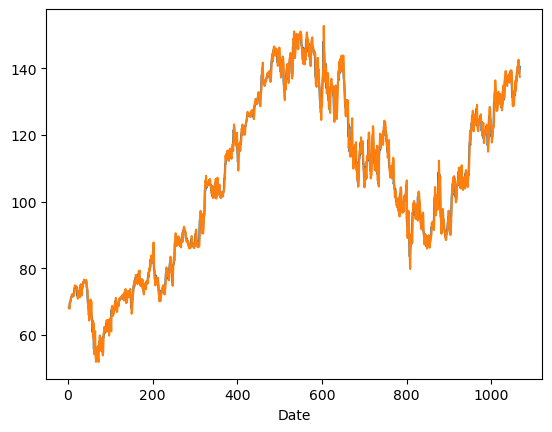

In [26]:
df_train['Close_numeric'][p:].plot()
fitted_values = model.fittedvalues
plt.plot(df_train.index[p:], fitted_values[p:], label='Fitted Values')
plt.xlabel('Date')


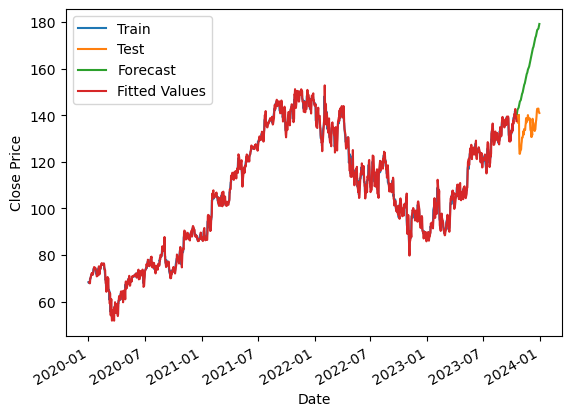

In [27]:
plt.plot(df_train['Date'], df_train['Close_numeric'], label='Train')
plt.plot(df_test['Date'],df_test['Close_numeric'] , label='Test')
#plt.plot(df_test['Date'], model.forecast(len(df_test)), label='Forecast')
plt.plot(df_test['Date'], model.forecast(len(df_test)), label='Forecast')
plt.plot(df_train['Date'][p:], fitted_values[p:], label='Fitted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


<Axes: >

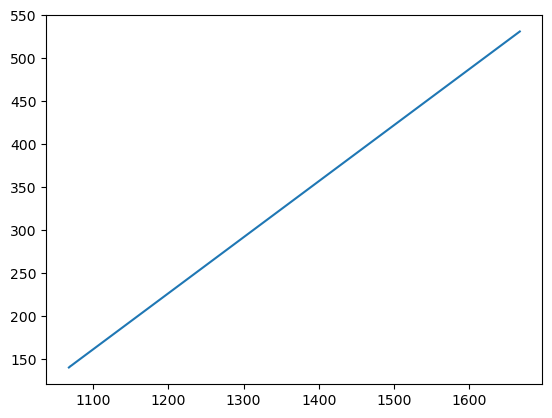

In [28]:
model.forecast(10*len(df_test)).plot()

In [29]:
from sklearn.metrics import mean_squared_error as mse
mse(df_test['Close_numeric'], model.forecast(len(df_test)))

719.6127137034645

In [30]:
# This function takes 3 numpy arrays as inputs.
# It returns the 
# mean absolute error of the forecast on the test set 
# relative to the
# mean absolute error of the naive forecast on the training set over an equivalent horizon.
# 
# If MASE > 1 then your forecast performs worse out of sample than naive forecast does in sample.
# If MASE < 1 then your forecast performs better out of sample than naive forecast does in sample.

def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n-m):
        denom += np.abs(y_train[i+1:i+m+1] - y_train[i]*np.ones(m)).mean()
    denom = denom / (n-m)
    num = np.abs(y_test - y_preds).mean()
    return num/denom

# Example calculation

print('MASE = ', mase(y_train = np.array([1,2,3,4,5]), y_test = np.array([6,7]), y_preds = np.array([3, 3])))


MASE =  2.3333333333333335


In [31]:
print('MASE = ', mase(y_train = df_train['Close_numeric'].values, y_test = df_test['Close_numeric'].values, y_preds = model.forecast(len(df_test))))

MASE =  3.267426973616018


In [32]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


Changin the hidden state to numeric

In [33]:
# Function to convert all entries to float and handle lists
def convert_to_float(value):
    if isinstance(value, list):
        if len(value) == 1:
            return float(value[0])
        else:
            # Handle multi-element lists if necessary (e.g., take mean or sum)
            return float(np.mean(value))
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the conversion function to both columns
df_train['hidden_state_numeric'] = df_train['hidden_state'].apply(convert_to_float)
df_test['hidden_state_numeric'] = df_test['hidden_state'].apply(convert_to_float)


ARIMA model selection with Cross_Validation WITHOUT exogonus variable. 

ADF test

In [52]:
from statsmodels.tsa.stattools import adfuller

# Extract the time series
time_series = df_train['Close_numeric'].diff().dropna()

# Perform ADF test
result = adfuller(time_series)

# Extract and print the results
adf_statistic, p_value, used_lag, n_obs, critical_values, ic_best = result

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {used_lag}')
print(f'Number of observations: {n_obs}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -33.94532148649266
p-value: 0.0
Number of lags used: 0
Number of observations: 1066
Critical Values:
   1%: -3.4364992651202697
   5%: -2.8642551098431968
   10%: -2.5682156239065925


In [55]:
df_train['Close_diff']=df_train['Close_numeric'].diff()
df_train['Close_diff'][0]=0
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1068 non-null   datetime64[ns]
 1   Close                 954 non-null    float64       
 2   hidden_state          1068 non-null   object        
 3   Close_numeric         1068 non-null   float64       
 4   hidden_state_numeric  1068 non-null   float64       
 5   Close_diff            1068 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 50.2+ KB


In [61]:
from sklearn.model_selection import TimeSeriesSplit
import itertools
CV = TimeSeriesSplit(n_splits=30,test_size=1)
mase_dict_wo = {}
mse_dict_wo = {}
p_range = range(2, 3)
d_range = range(2, 3)
q_range = range(3, 4)

for p, d, q in itertools.product(p_range, d_range, q_range):
    mase_list_wo = []
    mse_list_wo = []
    for i, (train_index , test_index) in enumerate(CV.split(df_train)):
        df_tt = df_train.iloc[train_index]
        df_ho = df_train.iloc[test_index]
        # model = sm.ARIMA(df_tt['Close_numeric'], exog=df_tt['hidden_state_numeric'], order = (p,d,q)).fit()
        model = sm.ARIMA(df_tt['Close_numeric'], order = (p,d,q)).fit()
        lag=max(p,q)
        #mase_list.append(mase(y_train = df_tt['Close_numeric'], y_test = df_ho['Close_numeric'], y_preds = model.forecast(len(df_ho),exog=(df_ho['hidden_state_numeric']))))
        mase_list_wo.append(mase(y_train = df_tt['Close_numeric'].values, y_test = df_ho['Close_numeric'].values, y_preds = model.forecast(len(df_ho))))
        #mse_list.append(mse(df_ho['Close_numeric'], model.forecast(len(df_ho),exog=(df_ho['hidden_state_numeric']))))
        mse_list_wo.append(mse(df_ho['Close_numeric'], model.forecast(len(df_ho))))    
    mase_dict_wo[(p,d,q)] = np.mean(mase_list_wo)
    mse_dict_wo[(p,d,q)] = np.mean(mse_list_wo)
    print(f"({p},{d},{q}) done")
    print('MASE = ', mase_dict_wo[(p,d,q)])
    print('MSE = ', mse_dict_wo[(p,d,q)])

min_mase_wo = min(mase_dict_wo, key=mase_dict_wo.get)
print('Min MASE:', min_mase_wo)
min_mse_wo = min(mse_dict_wo, key=mse_dict_wo.get)
print('Min MSE:', min_mse_wo)




(2,2,3) done
MASE =  1.028189075502364
MSE =  3.2417811580195806
Min MASE: (2, 2, 3)
Min MSE: (2, 2, 3)


In [60]:
print(mase_dict_wo[min_mase_wo])
print(np.sqrt(mse_dict_wo[min_mse_wo]))

0.6493595676886039
1.7941276667261634


In [62]:
print(mase_dict_wo[min_mase_wo])
print(np.sqrt(mse_dict_wo[min_mse_wo]))

1.028189075502364
1.800494698137037


In [63]:
df_train['Close_numeric'].diff().std()

2.0193996331663358

ARIMA model selection with Cross_Validation WITH exogonus variable. 

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import itertools
CV = TimeSeriesSplit(n_splits=30,test_size=1)
mase_dict = {}
mse_dict = {}
p_range = range(4, 5)
d_range = range(2,3 )
q_range = range(4, 5)

for p, d, q in itertools.product(p_range, d_range, q_range):
    mase_list = []
    mse_list = []
    for i, (train_index , test_index) in enumerate(CV.split(df_train)):
        df_tt = df_train.iloc[train_index]
        df_ho = df_train.iloc[test_index]
        model = sm.ARIMA(df_tt['Close_numeric'], exog=df_tt['hidden_state_numeric'], order = (p,d,q), seasonal_order=(1,1,1,5)).fit()
        #model = sm.ARIMA(df_tt['Close_numeric'], order = (p,d,q)).fit()
        lag=max(p,q)
        mase_list.append(mase(y_train = df_tt['Close_numeric'], y_test = df_ho['Close_numeric'], y_preds = model.forecast(len(df_ho),exog=(df_ho['hidden_state_numeric']))))
        #mase_list.append(mase(y_train = df_tt['Close_numeric'].values[lag:], y_test = df_ho['Close_numeric'].values, y_preds = model.forecast(len(df_ho))))
        mse_list.append(mse(df_ho['Close_numeric'], model.forecast(len(df_ho),exog=(df_ho['hidden_state_numeric']))))
        #mse_list.append(mse(df_ho['Close_numeric'], model.forecast(len(df_ho))))    
    mase_dict[(p,d,q)] = np.mean(mase_list)
    mse_dict[(p,d,q)] = np.mean(mse_list)
    print(f"({p},{d},{q}) done")
    print('MASE = ', mase_dict[(p,d,q)])
    print('MSE = ', mse_dict[(p,d,q)])

min_mase = min(mase_dict, key=mase_dict.get)
print('Min MASE:', min_mase)
min_mse = min(mse_dict, key=mse_dict.get)
print('Min MSE:', min_mse)

NameError: name 'df_train' is not defined

In [ ]:
print(mase_dict[min_mase])
print(np.sqrt(mse_dict[min_mse]))

1.02533361969031
1.8028490579710046
